# DA_Fall21_HW_3 Support Vector Machine and Decision Trees

# Due on 11/22 23:59 pm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## We will use the same affair dataset from HW2, but will skip the EDA phrase we have done enough of it

#### Everything removing outliers, create dummies variabes had been done for you

In [3]:
# Remember the affair data set from HW3, we will use that dataset again
# but we will directly load it from the API
orig_df = pd.read_csv("affairs2.csv")
# Set up our target class label
orig_df['had_affair'] = orig_df['affairs'].apply(lambda x: 1 if x != 0 else 0)
orig_df = orig_df.drop('affairs',axis=1)
# remove NA
orig_df.dropna(inplace=True)
# make sure there is no missing values
orig_df.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
had_affair         0
dtype: int64

In [4]:
# separate the features into categorical vs numerical
numerical_features = ['age', 'yrs_married', 'children']
categorical_features = ['rate_marriage', 'religious', 'educ', 'occupation', 'occupation_husb']
# collect all numerical features with the target variables first
numerical_df = orig_df[numerical_features + ['had_affair']]
numerical_df

,age,yrs_married,children,had_affair
0,32.0,9.0,3.0,1
1,27.0,13.0,3.0,1
2,22.0,2.5,0.0,1
3,37.0,16.5,4.0,1
4,27.0,9.0,1.0,1
...,...,...,...,...
6466,32.0,13.0,2.0,0
6467,32.0,13.0,1.0,0
6468,22.0,2.5,0.0,0
6469,32.0,6.0,1.0,0


In [5]:
# create corresponding dummies variables
rate_marriage = pd.get_dummies(orig_df['rate_marriage'],drop_first=True)
religious = pd.get_dummies(orig_df['religious'],drop_first=True)
edu = pd.get_dummies(orig_df['educ'],drop_first=True)
occ = pd.get_dummies(orig_df['occupation'],drop_first=True)
husb_occ = pd.get_dummies(orig_df['occupation_husb'],drop_first=True)

In [6]:
rate_marriage.head()

,2.0,3.0,4.0,5.0
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,0,1


In [7]:
religious.head()

,2.0,3.0,4.0
0,0,1,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0


In [8]:
# better to create a header to avoid same name
rate_marriage.columns = ['rate1','rate2','rate3','rate4']
rate_marriage

,rate1,rate2,rate3,rate4
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
6466,0,0,0,1
6467,0,0,1,0
6468,0,0,0,1
6469,0,0,0,1


In [9]:
religious.columns = ['rel1','rel2','rel3']
religious

,rel1,rel2,rel3
0,0,1,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
6466,0,1,0
6467,0,0,0
6468,1,0,0
6469,0,1,0


***Now we can concatnate the numerical features with rate_marriage and religious variabes***

In [10]:
df = pd.concat([numerical_df, rate_marriage, religious], axis=1)
df.head()

,age,yrs_married,children,had_affair,rate1,rate2,rate3,rate4,rel1,rel2,rel3
0,32.0,9.0,3.0,1,0,1,0,0,0,1,0
1,27.0,13.0,3.0,1,0,1,0,0,0,0,0
2,22.0,2.5,0.0,1,0,0,1,0,0,0,0
3,37.0,16.5,4.0,1,0,0,1,0,0,1,0
4,27.0,9.0,1.0,1,0,0,0,1,0,0,0


### The goal of this homework is to practice building Support Vector Machine and Decision Tree Models.

### Part A: Support Vector Machine

***Follow the standard way of building a model and in particular,***
1. Build a classification model using SVC using Linear Kernel without specifying the c-parameter using the above provided data frame
2. Try different values of C-parameters (at least one small and one bigger value)
3. Try using rbf as your kernel and use Gamma of 2**-5, 0.1, 1 and 2 with default value for C-parameter
4. Answer the question out of all the models above, what is the best choice for the kernel, C and gamma parameters
Explain briefly the effect of using different parameter values


***Type your answers and code here***

In [38]:
# 1. Build a classification model using SVC using Linear Kernel without specifying the c-parameter using the above provided data frame

# X features besides the had_affair which is what we are testing our independent factors against 
x = df.drop('had_affair',axis=1)
# x feature of values 
X = x.values
# Y features 
y = df['had_affair'].values

In [39]:
# TRAIN/TEST SPLIT
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [13]:
from sklearn import svm
# 2. Build a classification model using SVC using Linear Kernel without specifying the c-parameter
model_no_c = svm.SVC(kernel='linear')
model_no_c.fit(X_train, y_train)

SVC(kernel='linear')

In [14]:
from sklearn import svm
# 2. Try different values of C-parameters (at least one small and one bigger value)
# c_small
model_c_small = svm.SVC(kernel='linear',C=10)
model_c_small.fit(X_train, y_train)

SVC(C=10, kernel='linear')

In [15]:
from sklearn import svm
# 2. Try different values of C-parameters (at least one small and one bigger value)
# c_big
model_c_big = svm.SVC(kernel='linear', C=500)
model_c_big.fit(X_train, y_train)

SVC(C=500, kernel='linear')

In [16]:
from sklearn import svm
# 3. Try using rbf as your kernel and use Gamma of 2**-5, 0.1, 1 and 2 with default value for C-parameter
# 2**-5
model_rbf1 = svm.SVC(kernel='rbf',gamma=2**-5)
model_rbf1.fit(X_train, y_train)

SVC(gamma=0.03125)

In [17]:
from sklearn import svm
# 3. Try using rbf as your kernel and use Gamma of 2**-5, 0.1, 1 and 2 with default value for C-parameter
# 2**-0.1
model_rbf2 = svm.SVC(kernel='rbf',gamma=0.1)
model_rbf2.fit(X_train, y_train)

SVC(gamma=0.1)

In [18]:
from sklearn import svm
# 3. Try using rbf as your kernel and use Gamma of 2**-5, 0.1, 1 and 2 with default value for C-parameter
# 2**-1
model_rbf3 = svm.SVC(kernel='rbf',gamma=1)
model_rbf3.fit(X_train, y_train)

SVC(gamma=1)

In [19]:
from sklearn import svm
# 3. Try using rbf as your kernel and use Gamma of 2**-5, 0.1, 1 and 2 with default value for C-parameter
# 2**-1
model_rbf4 = svm.SVC(kernel='rbf',gamma=2)
model_rbf4.fit(X_train, y_train)

SVC(gamma=2)

In [20]:
print('''
sklearn.svm.SVC(C=1.0, kernel='rbf', gamma=0.0)
The Following are three(3) of the many parameters that we can tune in order to provide a better analytical model for our classification on this dataset.
C= The Penalty parameter C of the error term. It also controls the trade-off between smooth decision boundaries and classifying the training points correctly.
    A LOW C: (1)mis-classfication(2)soft-margin(3)less complicated model, high bias, low variance, may UNDERFIT
    a HIGH C: (1)Fits as much as possible, no mis-classification(2)hard-margin(3)more complicated model, high variance, low bias, may OVERFIT 
kernal = Various options are available with kernel such as: “linear”, “rbf”,”poly” and others (default value is “rbf”).  Here “rbf” and “poly” are useful for non-linear hyper-plane. While the "linear" SVM kernel if you have a large number of features (>1000) because it is more likely that the data is linearly separable in high dimensional space. Also, you can use RBF but do not forget to cross-validate for its parameters to avoid over-fitting.
    Kernal Parameter Manipulation will transform the dataset from a lower dimension space to a higher dimension space so that at the hgiher dimension, the dataset can be more easily seperated by the hyperplane that seperates classification. Changes the input space based to allow for new observations on a new FEATURE SPACE different from the original INPUT SPACE
gamma= The kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Higher the value of gamma, will try to exact fit the as per training data set i.e. generalization error and cause over-fitting problem.
    LARGE gamma will lead to overfitting 
    LOW gamma will lead to underfitting 
''')




sklearn.svm.SVC(C=1.0, kernel='rbf', gamma=0.0)
The Following are three(3) of the many parameters that we can tune in order to provide a better analytical model for our classification on this dataset.
C= The Penalty parameter C of the error term. It also controls the trade-off between smooth decision boundaries and classifying the training points correctly.
    A LOW C: (1)mis-classfication(2)soft-margin(3)less complicated model, high bias, low variance, may UNDERFIT
    a HIGH C: (1)Fits as much as possible, no mis-classification(2)hard-margin(3)more complicated model, high variance, low bias, may OVERFIT 
kernal = Various options are available with kernel such as: “linear”, “rbf”,”poly” and others (default value is “rbf”).  Here “rbf” and “poly” are useful for non-linear hyper-plane. While the "linear" SVM kernel if you have a large number of features (>1000) because it is more likely that the data is linearly separable in high dimensional space. Also, you can use RBF but do not for

In [21]:
# predictions_model_no_c 
predictions_model_no_c = model_no_c.predict(x_test)
print(f'AVERAGE PRECISION*RECALL:{(precision_score(y_test,predictions_model_no_c))+(recall_score(y_test,predictions_model_no_c))/(2)}\nPRECISION SCORE:{precision_score(y_test,predictions_model_no_c)}\nRECALL SCORE:{recall_score(y_test,predictions_model_no_c)}\n')

# predictions_model_c_small
predictions_model_c_small = model_c_small.predict(x_test)     
print(f'AVERAGE PRECISION*RECALL:{(precision_score(y_test,predictions_model_c_small))+(recall_score(y_test,predictions_model_c_small))/(2)}\nPRECISION SCORE:{precision_score(y_test,predictions_model_c_small)}\nRECALL SCORE:{recall_score(y_test,predictions_model_c_small)}\n')

# predictions_model_c_big
predictions_model_c_big = model_c_big.predict(x_test)                                         
print(f'AVERAGE PRECISION*RECALL:{(precision_score(y_test,predictions_model_c_big))+(recall_score(y_test,predictions_model_c_big))/(2)}\nPRECISION SCORE:{precision_score(y_test,predictions_model_c_big)}\nRECALL SCORE:{recall_score(y_test,predictions_model_c_big)}\n')

# predictions_model_rbf1
predictions_model_rbf1 = model_rbf1.predict(x_test)      
print(f'AVERAGE PRECISION*RECALL:{(precision_score(y_test,predictions_model_rbf1))+(recall_score(y_test,predictions_model_rbf1))/(2)}\nPRECISION SCORE:{precision_score(y_test,predictions_model_rbf1)}\nRECALL SCORE:{recall_score(y_test,predictions_model_rbf1)}\n')

# predictions_model_rbf2
predictions_model_rbf2 = model_rbf2.predict(x_test)      
print(f'AVERAGE PRECISION*RECALL:{(precision_score(y_test,predictions_model_rbf2))+(recall_score(y_test,predictions_model_rbf2))/(2)}\nPRECISION SCORE:{precision_score(y_test,predictions_model_rbf2)}\nRECALL SCORE:{recall_score(y_test,predictions_model_rbf2)}\n')

# predictions_model_rbf3
predictions_model_rbf3 = model_rbf3.predict(x_test)   
print(f'AVERAGE PRECISION*RECALL:{(precision_score(y_test,predictions_model_rbf3))+(recall_score(y_test,predictions_model_rbf3))/(2)}\nPRECISION SCORE:{precision_score(y_test,predictions_model_rbf3)}\nRECALL SCORE:{recall_score(y_test,predictions_model_rbf3)}\n')

# predictions_model_rbf4
predictions_model_rbf4 = model_rbf4.predict(x_test)  
print(f'AVERAGE PRECISION*RECALL:{(precision_score(y_test,predictions_model_rbf4))+(recall_score(y_test,predictions_model_rbf4))/(2)}\nPRECISION SCORE:{precision_score(y_test,predictions_model_rbf4)}\nRECALL SCORE:{recall_score(y_test,predictions_model_rbf4)}\n')

AVERAGE PRECISION*RECALL:0.8090448823207443
PRECISION SCORE:0.5972222222222222
RECALL SCORE:0.4236453201970443

AVERAGE PRECISION*RECALL:0.8090448823207443
PRECISION SCORE:0.5972222222222222
RECALL SCORE:0.4236453201970443

AVERAGE PRECISION*RECALL:0.8090448823207443
PRECISION SCORE:0.5972222222222222
RECALL SCORE:0.4236453201970443

AVERAGE PRECISION*RECALL:0.7398885143894218
PRECISION SCORE:0.5921052631578947
RECALL SCORE:0.2955665024630542

AVERAGE PRECISION*RECALL:0.778725935120179
PRECISION SCORE:0.5931758530183727
RECALL SCORE:0.37110016420361247

AVERAGE PRECISION*RECALL:0.7623014335528865
PRECISION SCORE:0.5898876404494382
RECALL SCORE:0.3448275862068966

AVERAGE PRECISION*RECALL:0.7292749431313177
PRECISION SCORE:0.5749235474006116
RECALL SCORE:0.30870279146141216



In [40]:
# Use Grid search, i.e. think of C and Gamma parameters as two dimension in a grid, run different combination of C and Gamma until you find a good combination so your result (precision and recall) is good enough
# metrics to score against against the whole DATASET
precision_score = make_scorer(precision_score)
recall_score = make_scorer(recall_score)

In [41]:
from sklearn.model_selection import GridSearchCV

# gridSearch for the 'linear' SVM
# gamma=none when linear
gridsearch_linear_accuracy = GridSearchCV(svm.SVC(kernel='linear'),{
    'C':[5,10,100,250,500]},scoring=precision_score, cv=5, return_train_score=False)
gridsearch_linear_accuracy.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [5, 10, 100, 250, 500]},
             scoring=make_scorer(precision_score))

In [42]:
print(f'C:{gridsearch_linear_accuracy.best_params_}\nPrecision_Score:{gridsearch_linear_accuracy.best_score_}')

C:{'C': 5}
Precision_Score:0.5855458032631493


In [43]:
# gridSearch for the 'linear' SVM
gridsearch_linear_recall = GridSearchCV(svm.SVC(kernel='linear'),{
    'C':[5,10,100,250,500]},scoring=recall_score, cv=5, return_train_score=False)
# Note that we fit on the complete DATASET with this 
gridsearch_linear_recall.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [5, 10, 100, 250, 500]},
             scoring=make_scorer(recall_score))

In [46]:
print(f'C:{gridsearch_linear_recall.best_params_}\nRecall_Score:{gridsearch_linear_recall.best_score_}')

C:{'C': 5}
Recall_Score:0.41013945759895554


In [48]:
# gridSearch for the 'rbf' SVM
gridsearch_rbf_accuracy = GridSearchCV(svm.SVC(kernel='rbf',C=1),{
    'gamma':[.0001,.001,.01,.1,1.0,1.5,2.0,5.0]},scoring=precision_score, cv=5, return_train_score=False)
# Note that we fit on the complete DATASET with this 
gridsearch_rbf_accuracy.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(C=1),
             param_grid={'gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 1.5, 2.0,
                                   5.0]},
             scoring=make_scorer(precision_score))

In [57]:
print(f'GAMMA:{gridsearch_rbf_accuracy.best_params_}\nPrecision_Score:{gridsearch_rbf_accuracy.best_score_}')

GAMMA:{'gamma': 0.01}
Precision_Score:0.6246996233692115


In [58]:
# gridSearch for the 'rbf' SVM
gridsearch_rbf_recall = GridSearchCV(svm.SVC(kernel='rbf',C=1),{
    'gamma':[.0001,.001,.01,.1,1.0,1.5,2.0,5.0]},scoring=recall_score, cv=5, return_train_score=False)
# Note that we fit on the complete DATASET with this 
gridsearch_rbf_recall.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(C=1),
             param_grid={'gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 1.5, 2.0,
                                   5.0]},
             scoring=make_scorer(recall_score))

In [60]:
print(f'GAMMA:{gridsearch_rbf_recall.best_params_}\nRecall_Score:{gridsearch_rbf_recall.best_score_}')

GAMMA:{'gamma': 1.0}
Recall_Score:0.3667853539849267


### Part B: Now we will try to fit the same dataset with Decision Trees

***Follow the standard way of building a model and in particular,***
1. Build a Decision Tree Classifier
2. Try using different max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 6 different models
3. Answer the question of what is your observation from step 2. Does the choice of the criterion important or not. What about max_depth? and What is the best choice of max_depth and criterion
4. Pick 3 models with max_depth = 2, 3, 4 and. You can pick which ever criterions you want and visualize the 3 trees.
5. Build a Random Forest Classifier with, say 100 trees. Comment on its model performance when compared with the individual trees models above


***Type your code and answers here***

In [63]:
from sklearn.tree import DecisionTreeClassifier
tree_model_1 = DecisionTreeClassifier(max_depth=2,criterion='gini',random_state=40)
tree_model_1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=40)

In [64]:
tree_model_2 = DecisionTreeClassifier(max_depth=2,criterion='entropy',random_state=40)
tree_model_2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=40)

In [65]:
tree_model_3 = DecisionTreeClassifier(max_depth=3,criterion='gini',random_state=40)
tree_model_3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=40)

In [66]:
tree_model_4 = DecisionTreeClassifier(max_depth=3,criterion='entropy',random_state=40)
tree_model_4.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=40)

In [69]:
tree_model_5 = DecisionTreeClassifier(max_depth=4,criterion='gini',random_state=40)
tree_model_5.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=40)

In [70]:
tree_model_6 = DecisionTreeClassifier(max_depth=4,criterion='entropy',random_state=40)
tree_model_6.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=40)

In [93]:
params = {
    'criterion':['gini','entropy'],
    'max_depth':[2,3,4,5,6],
}

grid_search_cv_tree_recall = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=40),
    param_grid=params,
    scoring='recall')

grid_search_cv_tree_precision = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=40),
    param_grid=params,
    scoring='precision')

In [94]:
grid_search_cv_tree_recall.fit(X,y)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=40),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6]},
             scoring='recall')

In [95]:
grid_search_cv_tree_precision.fit(X,y)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=40),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6]},
             scoring='precision')

In [96]:
print(f'Paramaters:{grid_search_cv_tree_precision.best_params_}\nPrecision_Score:{grid_search_cv_tree_precision.best_score_}')

Paramaters:{'criterion': 'gini', 'max_depth': 4}
Precision_Score:0.6247699998381837


In [97]:
print(f'Paramaters:{grid_search_cv_tree_recall.best_params_}\nRecall_Score:{grid_search_cv_tree_recall.best_score_}')

Paramaters:{'criterion': 'gini', 'max_depth': 6}
Recall_Score:0.4227962732182067


In [100]:
# Answer the question of what is your observation from step 2. Does the choice of the criterion important or not. What about max_depth? and What is the best choice of max_depth and criterion
print('''Seems to be a consensus that the criterion is set for the best metric scoring(precision/recall) with the criterion of "gini" and the max_depth seems to be different between the two metric scores we used. The max_depth for the best precision was 4 and the max_depth for the best recall score was 2.This all being said it seems that the 1st model with the criterion of "gini" and "max_depth of 2" and the fifth model with the criterion of "gini" as well but a "max_depth of 4" seems to be the best two possible choices for the best model. When I re-attempted this with large max_depths there seems to be a consensus that the larger the max_depth the better the scoring becomes in both categories of metric scoring(Recall and Precision)''')

Seems to be a consensus that the criterion is set for the best metric scoring(precision/recall) with the criterion of "gini" and the max_depth seems to be different between the two metric scores we used. The max_depth for the best precision was 4 and the max_depth for the best recall score was 2.This all being said it seems that the 1st model with the criterion of "gini" and "max_depth of 2" and the fifth model with the criterion of "gini" as well but a "max_depth of 4" seems to be the best two possible choices for the best model. When I re-attempted this with large max_depths there seems to be a consensus that the larger the max_depth the better the scoring becomes in both categories of metric scoring(Recall and Precision)


In [101]:
# criterion : {"gini", "entropy"}, default="gini"
# The function to measure the quality of a split. Supported criteria are
# "gini" for the Gini impurity and "entropy" for the information gain.

#  max_depth : int, default=None
# The maximum depth of the tree. If None, then nodes are expanded until
# all leaves are pure or until all leaves contain less than
# min_samples_split samples.

#splitter : {"best", "random"}, default="best"
#The strategy used to choose the split at each node. Supported
#strategies are "best" to choose the best split and "random" to choose
#the best random split.

#random_state : int, RandomState instance, default=None
#Controls the randomness of the estimator. The features are always
#randomly permuted at each split, even if ``splitter`` is set to
#``"best"``. When ``max_features < n_features``, the algorithm will
#select ``max_features`` at random at each split before finding the best
#split among them. But the best found split may vary across different
#runs, even if ``max_features=n_features``. That is the case, if the
#improvement of the criterion is identical for several splits and one
#split has to be selected at random. To obtain a deterministic behaviour
#during fitting, ``random_state`` has to be fixed to an integer.

In [141]:
# Pick 3 models with max_depth = 2, 3, 4 and. You can pick which ever criterions you want and visualize the 3 trees.
#model1 
tree_model_u_1 = DecisionTreeClassifier(max_depth=2,criterion='entropy', splitter='best', max_leaf_nodes=15, random_state=40)
tree_model_u_1.fit(X_train,y_train)

from sklearn import tree

features = df.drop('had_affair',axis=1).columns

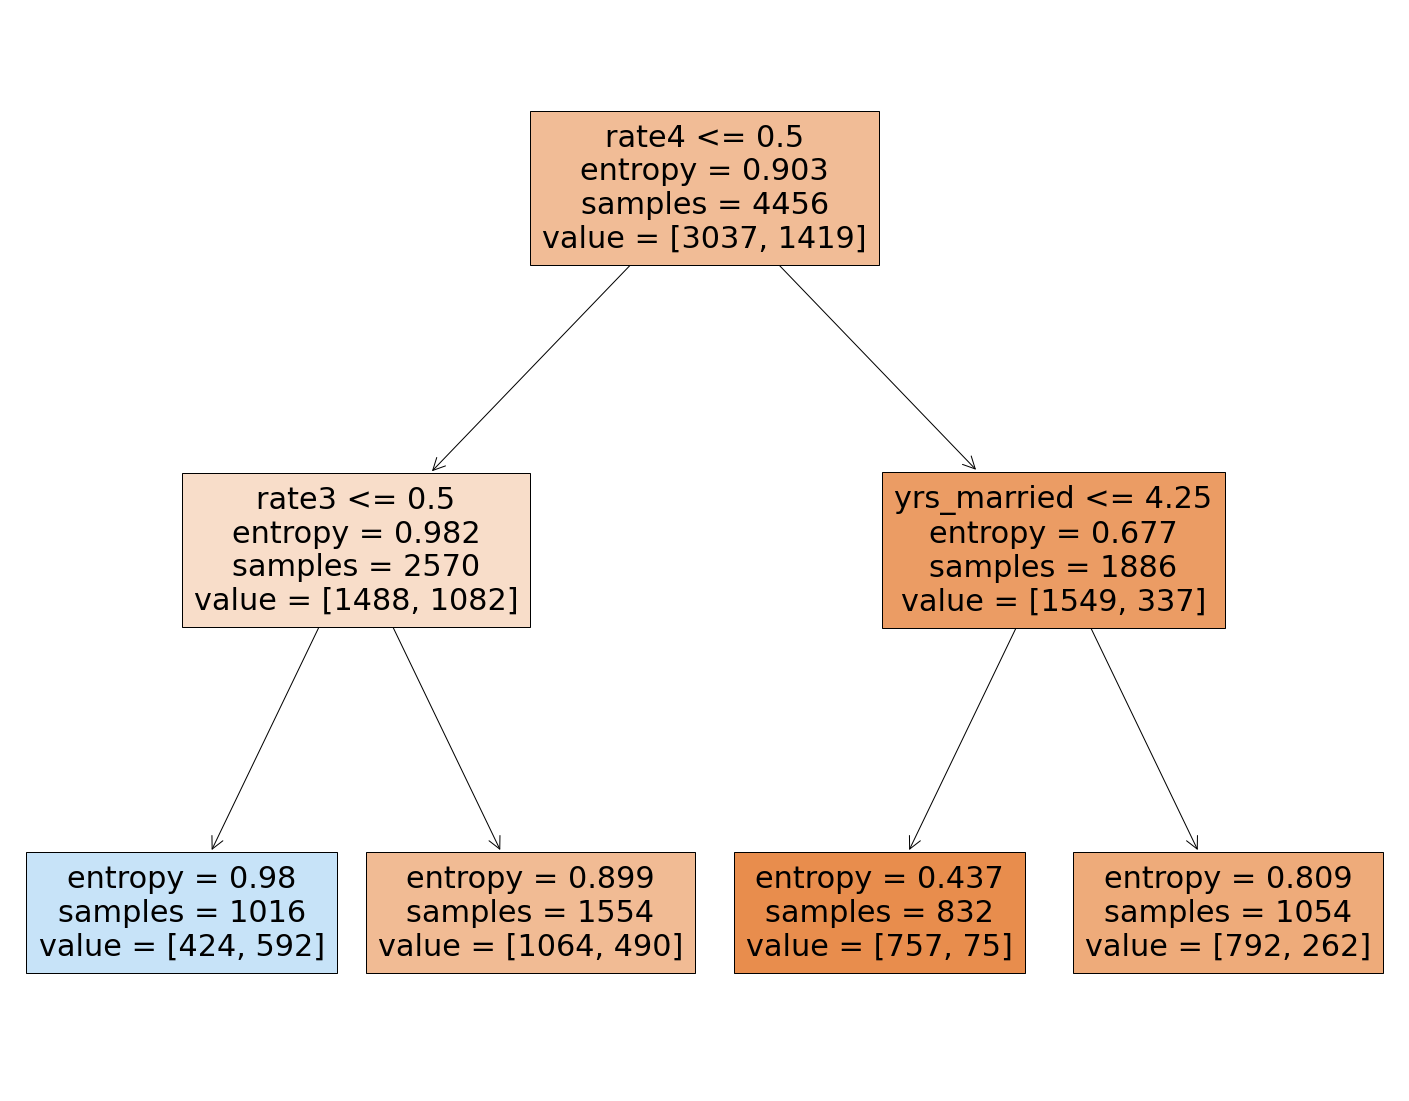

In [142]:
fig_1 = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_model_u_1, feature_names = features, filled=True)

In [202]:
tree_model_u_1_predictions = tree_model_u_1.predict(x_test)

In [217]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score 

precision_tree = precision_score(y_true=y_test,y_pred=tree_model_u_1_predictions)
print("Precision Score DecisionTree(1): %f" % precision_tree)
recall_tree = recall_score(y_true=y_test, y_pred=tree_model_u_1_predictions)
print("Recall Score DecisionTree(1): %f" % recall_tree)

Precision Score DecisionTree(1): 0.589623
Recall Score DecisionTree(1): 0.394322


In [220]:
#model2
tree_model_u_2 = DecisionTreeClassifier(max_depth=3,criterion='gini',splitter='random',random_state=40, max_leaf_nodes=5,class_weight='balanced')
tree_model_u_2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, max_leaf_nodes=5,
                       random_state=40, splitter='random')

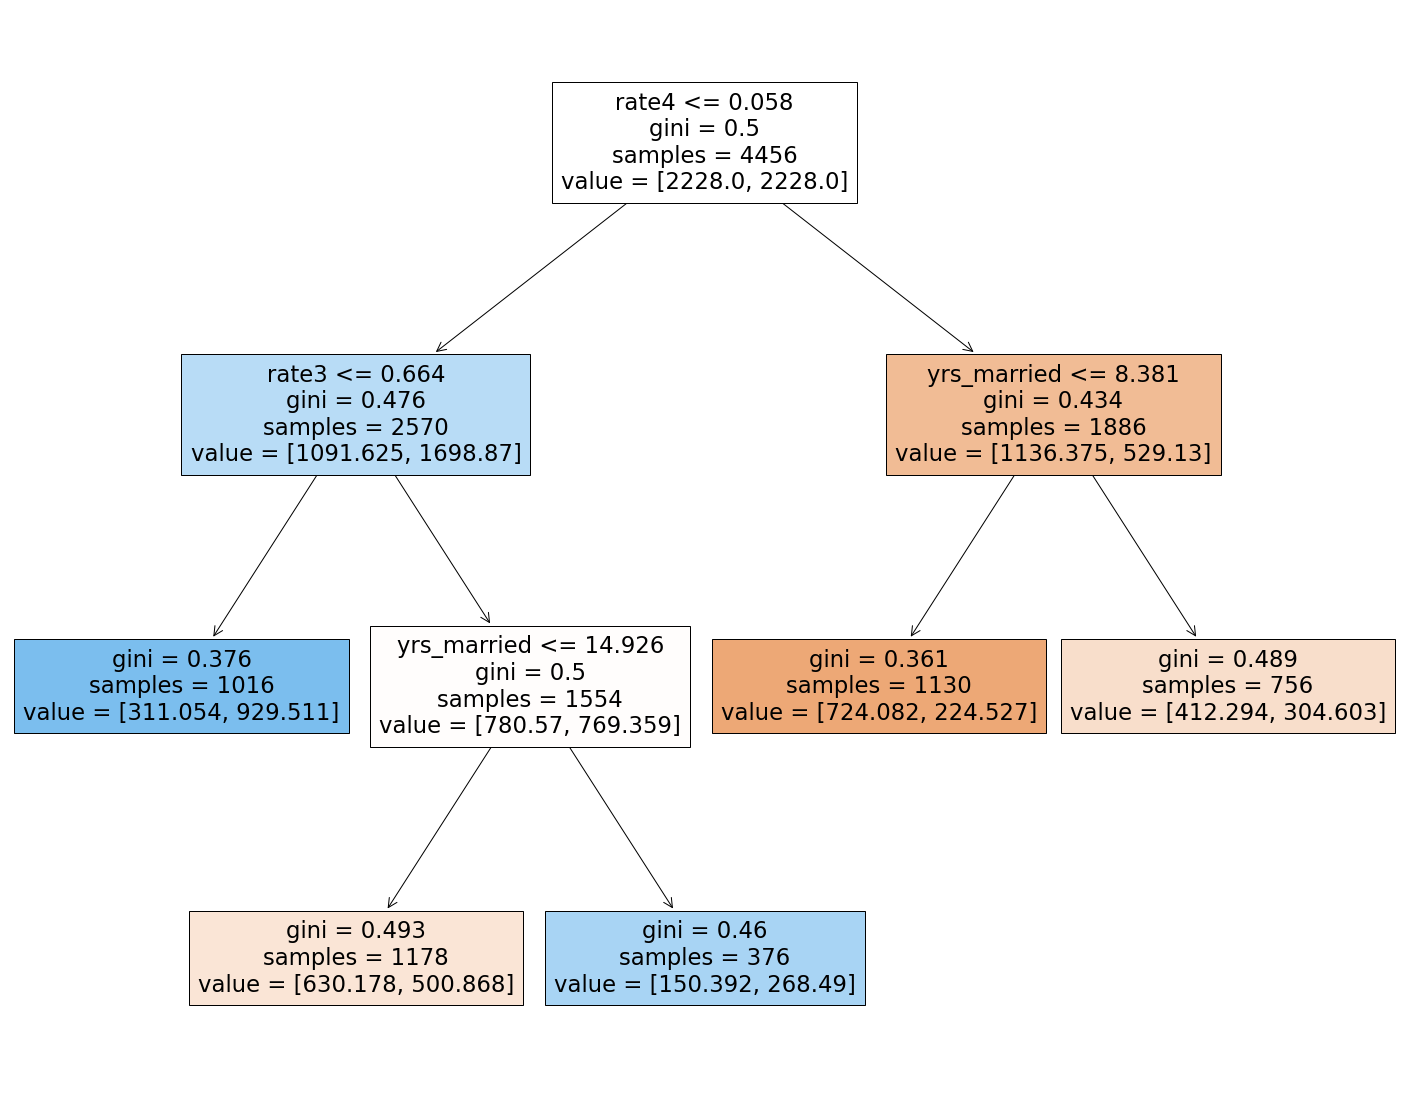

In [221]:
fig_2 = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_model_u_2, feature_names = features, filled=True)

In [225]:
tree_model_u_2_predictions = tree_model_u_2.predict(x_test)
from sklearn.metrics import precision_score, recall_score

precision_tree_2 = precision_score(y_true=y_test,y_pred=tree_model_u_2_predictions)
print("Precision Score DecisionTree(2): %f" % precision_tree_2)
recall_tree_2 = recall_score(y_true=y_test, y_pred=tree_model_u_2_predictions)
print("Recall Score DecisionTree(2): %f" % recall_tree_2)

Precision Score DecisionTree(2): 0.548718
Recall Score DecisionTree(2): 0.506309


In [207]:
#model3
tree_model_u_3 = DecisionTreeClassifier(max_depth=4,criterion='gini',splitter='best', max_leaf_nodes=10,random_state=40)
tree_model_u_3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10, random_state=40)

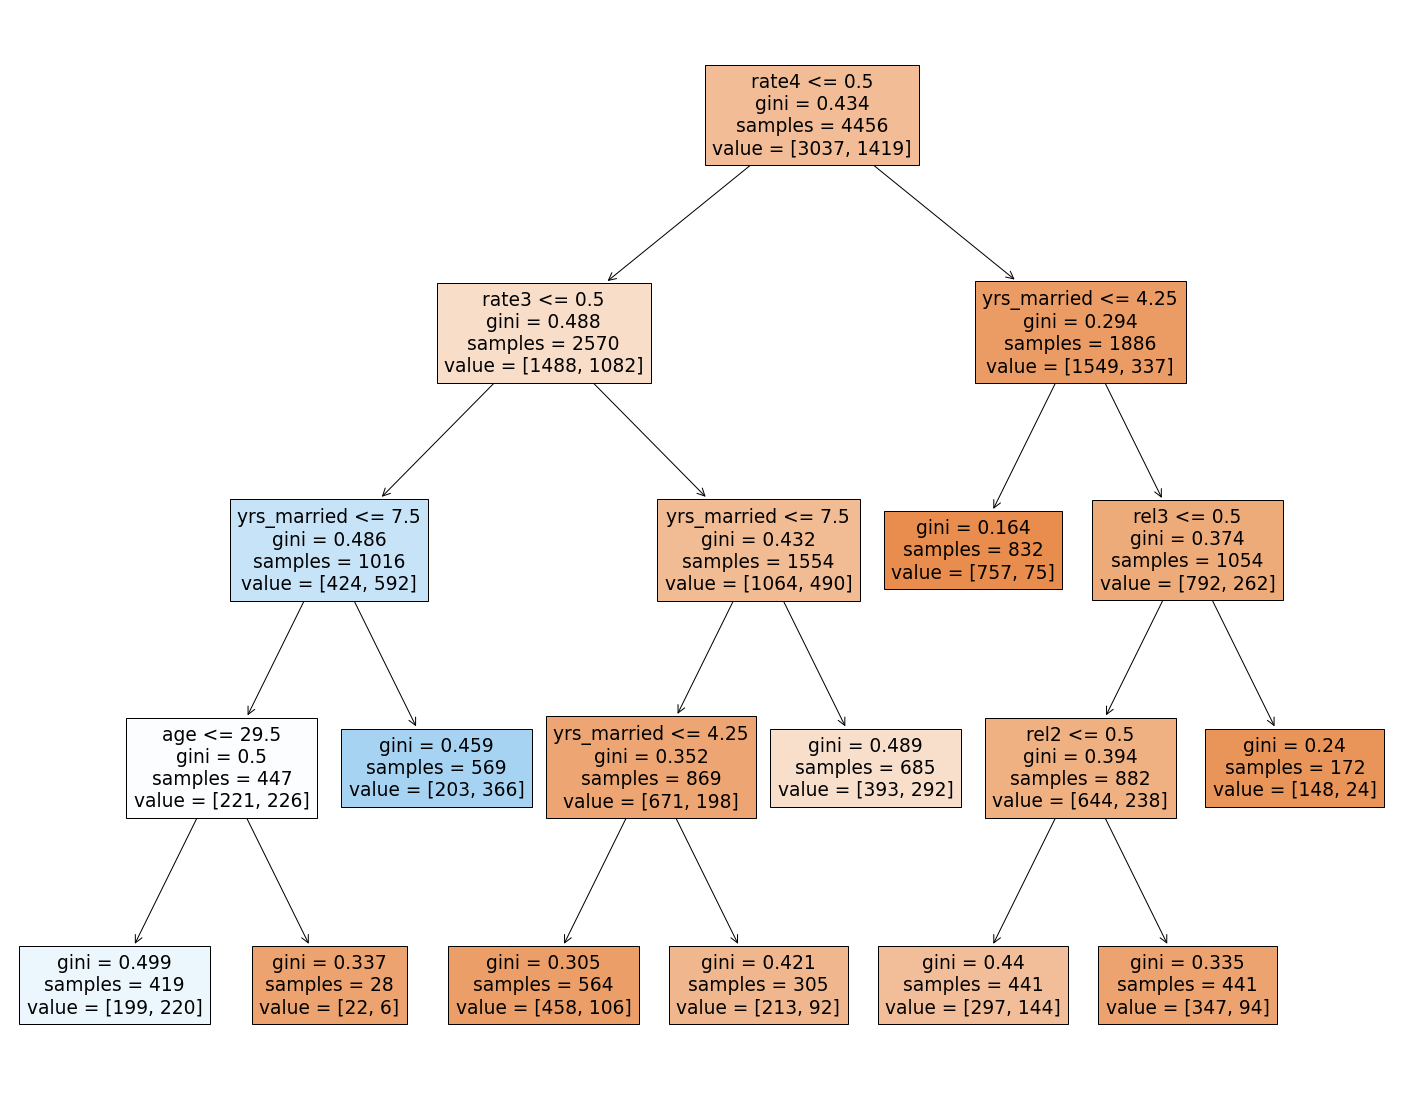

In [208]:
fig_3 = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_model_u_3, feature_names = features, filled=True)

In [219]:
tree_model_u_3_predictions = tree_model_u_3.predict(x_test)

precision_tree_3 = precision_score(y_true=y_test,y_pred=tree_model_u_3_predictions)
print("Precision Score DecisionTree(3): %f" % precision_tree_3)
recall_tree_3 = recall_score(y_true=y_test, y_pred=tree_model_u_3_predictions)
print("Recall Score DecisionTree(3): %f" % recall_tree_3)

Precision Score DecisionTree: 0.596618
Recall Score DecisionTree: 0.389590


In [210]:
# 5. Build a Random Forest Classifier with, say 100 trees. Comment on its model performance when compared with the individual trees models above
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import graphviz 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 

random_tree_model = RandomForestClassifier()
random_tree_model.fit(X_train,y_train)

#evaluating the model
random_y_pred = random_tree_model.predict(x_test)

In [215]:
precision_rforest = precision_score(y_true = y_test, y_pred = random_y_pred)
recall_rforest = recall_score(y_true = y_test, y_pred = random_y_pred)

print("\nPrecision score Random Forest:", precision_rforest, "\nRecall score Random Forest:", recall_rforest)


Precision score Random Forest: 0.5527522935779816 
Recall score Random Forest: 0.3801261829652997


In [226]:
print('''While our Random Forest model is meant to input and take in many more several independent features than our normal forest,and regressions the precision and recall score did not signifigantly improve. On the caveat, the recall score was much worse than the majority of the models that we used intially. It seems that due to the weight balance being equal among all the independent features may have introduced some bias, and overfitting on our model due to the small amount of classes/features we are trying to use as classifcation factors. The regular decisiontreeclassififer() produced better overall results which may have been due to the small amount of features we are using here! It intitutively makes sense that the random forest performed worse, as it shines with a much larger feature space''')

While our Random Forest model is meant to input and take in many more several independent features than our normal forest,and regressions the precision and recall score did not signifigantly improve. On the caveat, the recall score was much worse than the majority of the models that we used intially. It seems that due to the weight balance being equal among all the independent features may have introduced some bias, and overfitting on our model due to the small amount of classes/features we are trying to use as classifcation factors. The regular decisiontreeclassififer() produced better overall results which may have been due to the small amount of features we are using here! It intitutively makes sense that the random forest performed worse, as it shines with a much larger feature space


### Part C: Now finally create a dataframe including all other categorical variable and build decision tree model

In [228]:
# rename the columns 
edu.head()

,12.0,14.0,16.0,17.0,20.0
0,0,0,0,1,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [229]:
occ.head()

,occ2,occ3,occ4,occ5,occ6
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


In [230]:
husb_occ.head()

,2.0,3.0,4.0,5.0,6.0
0,0,0,0,1,0
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,1,0,0


In [232]:
# Type your code here, fill in the missing code here

edu.columns = ['edu1','edu2','edu3','edu4','edu5' ]
# edu = pd.get_dummies(orig_df['educ'],drop_first=True)
occ.columns = ['occ1','occ2','occ3','occ4','occ5']
# occ = pd.get_dummies(orig_df['occupation'],drop_first=True)
husb_occ.columns = ['husbocc1','husbocc2','husbocc3','husbocc4','husbocc5']
# husb_occ = pd.get_dummies(orig_df['occupation_husb'],drop_first=True)
df_2 = pd.concat([numerical_df, rate_marriage, religious,edu,occ,husb_occ], axis=1)
df_2.head()
# df2 = pd.concat[df, ....]

# df2.columns

,age,yrs_married,children,had_affair,rate1,rate2,rate3,rate4,rel1,rel2,...,occ1,occ2,occ3,occ4,occ5,husbocc1,husbocc2,husbocc3,husbocc4,husbocc5
0,32.0,9.0,3.0,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,27.0,13.0,3.0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,22.0,2.5,0.0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,37.0,16.5,4.0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,27.0,9.0,1.0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


***Use the same model as in Part B step 1 with this new dataframe. Comment on whether the additional variables help the model performance or not***

***Type your code and answers here***

In [234]:
# 1. Build a classification model using SVC using Linear Kernel without specifying the c-parameter using the above provided data frame

# X features besides the had_affair which is what we are testing our independent factors against 
X_c = df_2.drop('had_affair',axis=1)
# x feature of values 
X_C = X_c.values
# Y features 
y_C = df_2['had_affair'].values

In [2]:
# PART B step 1 
# TRAIN/TEST new variables 
# Not Needed but makes it less linear
X_train_new, x_test_new, y_train_new, y_test_new = train_test_split(X_C,y_C,test_size=0.30)

from sklearn.tree import DecisionTreeClassifier
tree_model_new = DecisionTreeClassifier(max_depth=2,criterion='gini',random_state=40)
tree_model_new.fit(X_train_new,y_train_new)
tree_model_new_pred = tree_model_new.predict(x_test_new)

NameError: name 'train_test_split' is not defined

In [4]:
from sklearn.metrics import precision_score, recall_score

precision_tree_new_score = precision_score(y_true=y_test_new,y_pred=tree_model_new_pred)
print("Precision Score DecisionTree(C): %f" % precision_tree_new_score)

recall_tree_new_score = recall_score(y_true=y_test_new, y_pred=tree_model_new_pred)
print("Recall Score DecisionTree(C): %f" % recall_tree_new_score)

NameError: name 'y_test_new' is not defined

In [ ]:
print('''The scores went way down in almost every facet, which makes sense as the model has more features it has to try to classify the characterisitic of "Had_Affair". We are essetially trying to provide a model (DECISIONTREECLASSIFIER()) with more features when it isn't designed for such a large feature space. As we used teh first model that we created here, the max_depth of the DecisionTree is two which made sense when the independent variables/features were much smaller in their instances. As the feature space increased after we added three new other categorical variables it made the model have much more features and thus more options. Due to our small amount of max_depth being two in this example, it makes sense that this model did far worse when we placed all the rest of the feature space into the model. We should use RandomForestClassification() as it was created with this purpose in mind!''')